In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_set = df = pd.read_csv('housing.csv')
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data_frame = pd.DataFrame(data_set)


In [2]:
data_frame = data_frame.drop(["longitude", "latitude","households"],axis=1)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
data_frame.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data_frame = data_frame.dropna() # drops rows containig nan value

In [6]:

data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['ocean_proximity'])],axis = 1)
data_frame = data_frame.drop('ocean_proximity',axis = 1)

In [7]:
model = LinearRegression()
X = data_frame[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'median_income', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN']]
Y = data_frame[['median_house_value']]
model.fit(X,Y)

LinearRegression()

In [8]:
# (x - xmin) / (xmax - xmin) # minmax method

In [9]:
predict1 = model.predict(X)

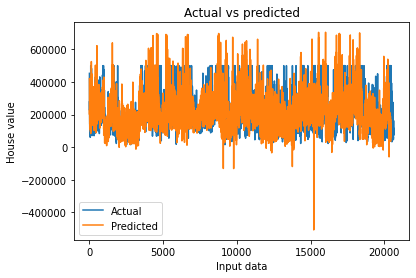

In [10]:
plt.plot(data_frame['median_house_value'], label = "Actual")
plt.plot(predict1, label = "Predicted")
plt.title("Actual vs predicted")
plt.legend()#
plt.xlabel("Input data")
plt.ylabel("House value")
plt.show()


In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(data_frame['median_house_value'],predict1)

0.6326069156853553

In [13]:
data_frame.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'median_income', 'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [14]:
input = {

    'housing_median_age':10,
    'total_rooms':5,
    'total_bedrooms':2,
    'population':100000,
    'median_income':500000,
    'ocean_proximity':'INLAND'

}

In [15]:
xtest = pd.DataFrame(input,index = [1])
if input['ocean_proximity'] != 'ISLAND':
    xtest['ISLAND'] = [0]  
if input['ocean_proximity'] != 'NEAR OCEAN':
    xtest['NEAR OCEAN'] = [0]
if input['ocean_proximity'] != 'INLAND':
    xtest['INLAND'] = [0]
if input['ocean_proximity'] != 'NEAR BAY':
    xtest['NEAR BAY'] = [0]
if input['ocean_proximity'] != '<1H OCEAN':
    xtest['<1H OCEAN'] = [0]
xtest = pd.concat([xtest, pd.get_dummies(xtest['ocean_proximity'])],axis = 1)
xtest = xtest.drop('ocean_proximity',axis = 1)

In [16]:
xtest

,housing_median_age,total_rooms,total_bedrooms,population,median_income,ISLAND,NEAR OCEAN,NEAR BAY,<1H OCEAN,INLAND
1,10,5,2,100000,500000,0,0,0,0,1


In [17]:
model.predict(xtest[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'median_income', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN']])

array([[2.03939275e+10]])